<a href="https://colab.research.google.com/github/ehpub/ML-with-Python/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_with_python_002_%EC%B2%AB_%EB%A7%8C%EB%82%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[설명](https://souce.tistory.com/745)

사용할 모듈 포함문

In [46]:
from sklearn import datasets #머신 러닝 학습에 사용할 수 있는 데이터들
from sklearn.preprocessing import MinMaxScaler #전처리 공정 중에 MinMaxScaler
from sklearn.model_selection import train_test_split #데이터를 학습 및 테스트 용으로 분리
from sklearn import neighbors,linear_model #이웃 및 선형 모델
from sklearn.metrics import accuracy_score #평가 방법 중에 적합도
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 테스트에 사용할 데이터

In [3]:
iris = datasets.load_iris() #붓꽃 데이터 로드

In [7]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [14]:
for key in iris.keys():
  print(key,":",type(iris[key]))

data : <class 'numpy.ndarray'>
target : <class 'numpy.ndarray'>
frame : <class 'NoneType'>
target_names : <class 'numpy.ndarray'>
DESCR : <class 'str'>
feature_names : <class 'list'>
filename : <class 'str'>
data_module : <class 'str'>


In [25]:
print(iris.data[0])
print(iris.data.shape)
print(iris.feature_names)

[5.1 3.5 1.4 0.2]
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [24]:
print(iris.target .shape)
print(np.unique(iris.target,return_counts=True))
print(iris.target_names)

(150,)
(array([0, 1, 2]), array([50, 50, 50]))
['setosa' 'versicolor' 'virginica']


## 데이터 전처리

In [28]:
mms = MinMaxScaler()
x_data = mms.fit_transform(iris.data)

In [49]:
o_df = pd.DataFrame(iris.data)
display(o_df.describe())

df = pd.DataFrame(x_data)
display(df.describe())

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_data, iris.target)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [41]:
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train)
print(x_train2.shape, x_val.shape, y_train2.shape, y_val.shape)

(84, 4) (28, 4) (84,) (28,)


## 모델링(데이터 학습)

In [43]:
model1 = linear_model.LogisticRegression()
model2 = neighbors.KNeighborsClassifier()
for model in [model1,model2]:
  print(model.__class__.__name__,"###")
  model.fit(x_train2,y_train2)
  val_pred = model.predict(x_val)
  print(f"accuray:{accuracy_score(val_pred,y_val):.3f}")

LogisticRegression ###
accuray:0.750
KNeighborsClassifier ###
accuray:0.964


In [50]:
print("선정 모델:",model2.__class__.__name__)
test_pred = model2.predict(x_test)
print(f"최종 accuray:{accuracy_score(test_pred,y_test):.3f}")

선정 모델: KNeighborsClassifier
최종 accuray:0.974


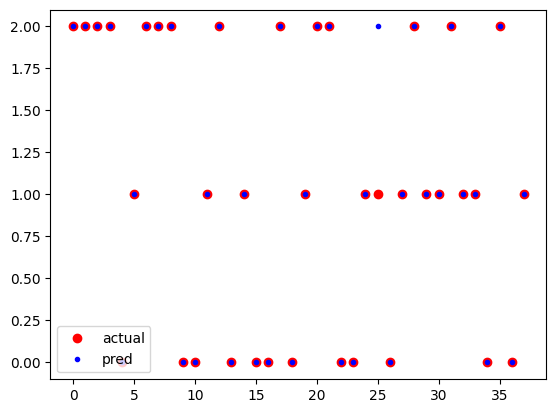

In [53]:
plt.plot(y_test,'ro',label='actual')
plt.plot(test_pred,'b.',label='pred')
plt.legend()
plt.show()